In [19]:
### Setup data,model,ntk method

import torch
from torchvision.transforms import ToTensor
from torchvision import datasets
from tqdm import tqdm
import definitions as df
from importlib import reload
import definitions as df
import definitions_2 as df2
import torch
from tqdm import tqdm
import importlib
import numpy as np
from torch import nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import solvers
import models as model
importlib.reload(model)
importlib.reload(solvers)

torch.set_default_dtype(torch.float64)

reload(df)
reload(df2)

N_TRAIN = 1000
N_TEST = 5
N_OUTPUT = 10

training_data = datasets.MNIST(
    root="data/MNIST",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data/MNIST",
    train=False,
    download=True,
    transform=ToTensor()
)


class Reshape(torch.nn.Module):
    def forward(self, x):
        return x.view(-1, 1, 28, 28)

class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = torch.nn.Sequential(
            Reshape(),
            nn.Conv2d(1, 6, kernel_size=5, padding=2),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(16 * 5 * 5, 120),
            nn.Sigmoid(),
            nn.Linear(120, 84),
            nn.Sigmoid(),
            nn.Linear(84, 10),
        )

    def forward(self,x):
        return self.net(x)
    
def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)
    

training_data = torch.utils.data.Subset(training_data,range(N_TRAIN))
test_data = torch.utils.data.Subset(test_data,range(N_TEST))

batch_size = 50

train_dataloader = DataLoader(training_data, batch_size)
test_dataloader = DataLoader(test_data, N_TEST)
test_x,test_y = next(iter(test_dataloader))

ntk_net = LeNet5()
ntk_net.apply(init_weights)
ntk_net.eval()
num_weights = sum(p.numel() for p in ntk_net.parameters() if p.requires_grad)

print("Number of parameters p = {}".format(sum(p.numel() for p in ntk_net.parameters() if p.requires_grad)))
print("Number of training points = {}".format(len(training_data)))

learning_rate = 5e-3
epochs = 100

ce_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(ntk_net.parameters(), lr=learning_rate, weight_decay=1e-5)

ntk_train_ce, ntk_test_ce, ntk_test_acc = df2.training(train_dataloader,test_dataloader,ntk_net,ce_loss,optimizer,epochs,verbose=True)


Number of parameters p = 61706
Number of training points = 1000


  1%|          | 1/100 [00:00<00:28,  3.51it/s]

Epoch 0 of 100
Training CE = 2.3474
Test CE = 2.2570
Test accuracy = 20.0%

 -------------------------------------


  5%|▌         | 5/100 [00:01<00:20,  4.54it/s]

Epoch 4 of 100
Training CE = 1.7888
Test CE = 0.9339
Test accuracy = 80.0%

 -------------------------------------


  9%|▉         | 9/100 [00:02<00:20,  4.50it/s]

Epoch 8 of 100
Training CE = 0.5246
Test CE = 0.0597
Test accuracy = 100.0%

 -------------------------------------


 13%|█▎        | 13/100 [00:02<00:19,  4.53it/s]

Epoch 12 of 100
Training CE = 0.2826
Test CE = 0.0187
Test accuracy = 100.0%

 -------------------------------------


 17%|█▋        | 17/100 [00:03<00:18,  4.55it/s]

Epoch 16 of 100
Training CE = 0.1675
Test CE = 0.0116
Test accuracy = 100.0%

 -------------------------------------


 21%|██        | 21/100 [00:04<00:16,  4.67it/s]

Epoch 20 of 100
Training CE = 0.0836
Test CE = 0.0094
Test accuracy = 100.0%

 -------------------------------------


 26%|██▌       | 26/100 [00:05<00:15,  4.77it/s]

Epoch 24 of 100
Training CE = 0.0467
Test CE = 0.0062
Test accuracy = 100.0%

 -------------------------------------


 30%|███       | 30/100 [00:06<00:14,  4.79it/s]

Epoch 28 of 100
Training CE = 0.0294
Test CE = 0.0055
Test accuracy = 100.0%

 -------------------------------------


 33%|███▎      | 33/100 [00:07<00:13,  4.79it/s]

Epoch 32 of 100
Training CE = 0.0214
Test CE = 0.0042
Test accuracy = 100.0%

 -------------------------------------


 37%|███▋      | 37/100 [00:08<00:13,  4.80it/s]

Epoch 36 of 100
Training CE = 0.0141
Test CE = 0.0032
Test accuracy = 100.0%

 -------------------------------------


 41%|████      | 41/100 [00:08<00:12,  4.68it/s]

Epoch 40 of 100
Training CE = 0.0105
Test CE = 0.0025
Test accuracy = 100.0%

 -------------------------------------


 45%|████▌     | 45/100 [00:09<00:11,  4.80it/s]

Epoch 44 of 100
Training CE = 0.0080
Test CE = 0.0018
Test accuracy = 100.0%

 -------------------------------------


 50%|█████     | 50/100 [00:10<00:10,  4.77it/s]

Epoch 48 of 100
Training CE = 0.0061
Test CE = 0.0012
Test accuracy = 100.0%

 -------------------------------------


 53%|█████▎    | 53/100 [00:11<00:10,  4.69it/s]

Epoch 52 of 100
Training CE = 0.0048
Test CE = 0.0010
Test accuracy = 100.0%

 -------------------------------------


 58%|█████▊    | 58/100 [00:12<00:08,  4.77it/s]

Epoch 56 of 100
Training CE = 0.0041
Test CE = 0.0008
Test accuracy = 100.0%

 -------------------------------------


 61%|██████    | 61/100 [00:13<00:08,  4.79it/s]

Epoch 60 of 100
Training CE = 0.0035
Test CE = 0.0007
Test accuracy = 100.0%

 -------------------------------------


 66%|██████▌   | 66/100 [00:14<00:07,  4.65it/s]

Epoch 64 of 100
Training CE = 0.0031
Test CE = 0.0006
Test accuracy = 100.0%

 -------------------------------------


 69%|██████▉   | 69/100 [00:14<00:06,  4.66it/s]

Epoch 68 of 100
Training CE = 0.0028
Test CE = 0.0005
Test accuracy = 100.0%

 -------------------------------------


 73%|███████▎  | 73/100 [00:15<00:05,  4.70it/s]

Epoch 72 of 100
Training CE = 0.0026
Test CE = 0.0004
Test accuracy = 100.0%

 -------------------------------------


 78%|███████▊  | 78/100 [00:16<00:04,  4.82it/s]

Epoch 76 of 100
Training CE = 0.0024
Test CE = 0.0004
Test accuracy = 100.0%

 -------------------------------------


 82%|████████▏ | 82/100 [00:17<00:03,  4.76it/s]

Epoch 80 of 100
Training CE = 0.0022
Test CE = 0.0004
Test accuracy = 100.0%

 -------------------------------------


 85%|████████▌ | 85/100 [00:18<00:03,  4.78it/s]

Epoch 84 of 100
Training CE = 0.0021
Test CE = 0.0003
Test accuracy = 100.0%

 -------------------------------------


 89%|████████▉ | 89/100 [00:19<00:02,  4.59it/s]

Epoch 88 of 100
Training CE = 0.0020
Test CE = 0.0003
Test accuracy = 100.0%

 -------------------------------------


 94%|█████████▍| 94/100 [00:20<00:01,  4.71it/s]

Epoch 92 of 100
Training CE = 0.0019
Test CE = 0.0003
Test accuracy = 100.0%

 -------------------------------------


 97%|█████████▋| 97/100 [00:20<00:00,  4.69it/s]

Epoch 96 of 100
Training CE = 0.0018
Test CE = 0.0003
Test accuracy = 100.0%

 -------------------------------------


100%|██████████| 100/100 [00:21<00:00,  4.66it/s]

Done!
Final training cross-entropy = 0.0017
Final test cross-entropy = 0.0002
Final test accuracy = 100.0%


In [16]:
### Train NTK Network on Brier Loss
mse = nn.MSELoss()

def brier_loss(pred,target):
    pred = pred.softmax(dim=1)
    target = df.one_hot(target,N_OUTPUT)
    return mse(pred,target)

ntk_softmax_net = LeNet5()
ntk_softmax_net.apply(init_weights)
ntk_softmax_net.eval()
learning_rate = 5e-3

mse = nn.MSELoss()
optimizer = torch.optim.Adam(ntk_softmax_net.parameters(), lr=learning_rate, weight_decay=1e-5)

ntk_train_brier, ntk_test_brier, ntk_test_acc = df2.training(train_dataloader,test_dataloader,ntk_softmax_net,brier_loss,optimizer,epochs,verbose=True)

  1%|          | 1/100 [00:00<00:21,  4.62it/s]

Epoch 0 of 100
Training CE = 0.0914
Test CE = 0.0896
Test accuracy = 20.0%

 -------------------------------------


  6%|▌         | 6/100 [00:01<00:19,  4.78it/s]

Epoch 4 of 100
Training CE = 0.0902
Test CE = 0.0890
Test accuracy = 20.0%

 -------------------------------------


  9%|▉         | 9/100 [00:01<00:19,  4.66it/s]

Epoch 8 of 100
Training CE = 0.0584
Test CE = 0.0280
Test accuracy = 80.0%

 -------------------------------------


 13%|█▎        | 13/100 [00:02<00:18,  4.62it/s]

Epoch 12 of 100
Training CE = 0.0225
Test CE = 0.0100
Test accuracy = 100.0%

 -------------------------------------


 17%|█▋        | 17/100 [00:03<00:17,  4.67it/s]

Epoch 16 of 100
Training CE = 0.0134
Test CE = 0.0002
Test accuracy = 100.0%

 -------------------------------------


 21%|██        | 21/100 [00:04<00:16,  4.65it/s]

Epoch 20 of 100
Training CE = 0.0111
Test CE = 0.0001
Test accuracy = 100.0%

 -------------------------------------


 25%|██▌       | 25/100 [00:05<00:16,  4.62it/s]

Epoch 24 of 100
Training CE = 0.0070
Test CE = 0.0001
Test accuracy = 100.0%

 -------------------------------------


 29%|██▉       | 29/100 [00:06<00:15,  4.71it/s]

Epoch 28 of 100
Training CE = 0.0061
Test CE = 0.0001
Test accuracy = 100.0%

 -------------------------------------


 33%|███▎      | 33/100 [00:07<00:14,  4.69it/s]

Epoch 32 of 100
Training CE = 0.0071
Test CE = 0.0003
Test accuracy = 100.0%

 -------------------------------------


 37%|███▋      | 37/100 [00:07<00:13,  4.51it/s]

Epoch 36 of 100
Training CE = 0.0035
Test CE = 0.0000
Test accuracy = 100.0%

 -------------------------------------


 42%|████▏     | 42/100 [00:09<00:12,  4.66it/s]

Epoch 40 of 100
Training CE = 0.0027
Test CE = 0.0000
Test accuracy = 100.0%

 -------------------------------------


 45%|████▌     | 45/100 [00:09<00:11,  4.59it/s]

Epoch 44 of 100
Training CE = 0.0022
Test CE = 0.0000
Test accuracy = 100.0%

 -------------------------------------


 49%|████▉     | 49/100 [00:10<00:10,  4.69it/s]

Epoch 48 of 100
Training CE = 0.0028
Test CE = 0.0000
Test accuracy = 100.0%

 -------------------------------------


 53%|█████▎    | 53/100 [00:11<00:10,  4.67it/s]

Epoch 52 of 100
Training CE = 0.0027
Test CE = 0.0001
Test accuracy = 100.0%

 -------------------------------------


 57%|█████▋    | 57/100 [00:12<00:09,  4.57it/s]

Epoch 56 of 100
Training CE = 0.0029
Test CE = 0.0000
Test accuracy = 100.0%

 -------------------------------------


 62%|██████▏   | 62/100 [00:13<00:07,  4.76it/s]

Epoch 60 of 100
Training CE = 0.0020
Test CE = 0.0000
Test accuracy = 100.0%

 -------------------------------------


 65%|██████▌   | 65/100 [00:14<00:07,  4.68it/s]

Epoch 64 of 100
Training CE = 0.0022
Test CE = 0.0000
Test accuracy = 100.0%

 -------------------------------------


 69%|██████▉   | 69/100 [00:14<00:06,  4.61it/s]

Epoch 68 of 100
Training CE = 0.0021
Test CE = 0.0002
Test accuracy = 100.0%

 -------------------------------------


 73%|███████▎  | 73/100 [00:15<00:05,  4.69it/s]

Epoch 72 of 100
Training CE = 0.0021
Test CE = 0.0000
Test accuracy = 100.0%

 -------------------------------------


 78%|███████▊  | 78/100 [00:16<00:04,  4.74it/s]

Epoch 76 of 100
Training CE = 0.0016
Test CE = 0.0001
Test accuracy = 100.0%

 -------------------------------------


 81%|████████  | 81/100 [00:17<00:03,  4.76it/s]

Epoch 80 of 100
Training CE = 0.0031
Test CE = 0.0000
Test accuracy = 100.0%

 -------------------------------------


 85%|████████▌ | 85/100 [00:18<00:03,  4.72it/s]

Epoch 84 of 100
Training CE = 0.0018
Test CE = 0.0000
Test accuracy = 100.0%

 -------------------------------------


 90%|█████████ | 90/100 [00:19<00:02,  4.76it/s]

Epoch 88 of 100
Training CE = 0.0018
Test CE = 0.0000
Test accuracy = 100.0%

 -------------------------------------


 93%|█████████▎| 93/100 [00:20<00:01,  4.55it/s]

Epoch 92 of 100
Training CE = 0.0019
Test CE = 0.0000
Test accuracy = 100.0%

 -------------------------------------


 97%|█████████▋| 97/100 [00:20<00:00,  4.72it/s]

Epoch 96 of 100
Training CE = 0.0016
Test CE = 0.0000
Test accuracy = 100.0%

 -------------------------------------


100%|██████████| 100/100 [00:21<00:00,  4.65it/s]

Done!
Final training cross-entropy = 0.0016
Final test cross-entropy = 0.0000
Final test accuracy = 100.0%


In [3]:
### Find NTK Kappa condition number and eigenvalues

from functorch import make_functional_with_buffers
reload(df)

fnet, params, buffers = make_functional_with_buffers(ntk_net)     

def fnet_single(params, x):
    # return fnet(params, buffers, x.unsqueeze(0)).squeeze(0).softmax(dim=0)[0].reshape(1) # if brier
    return fnet(params, buffers, x.unsqueeze(0)).squeeze(0)[0].reshape(1) # if n0t brier loss

dataset1_ntk = DataLoader(training_data,len(training_data))
x1_ntk,_ = next(iter(dataset1_ntk))
dataset_train = DataLoader(test_data,1)
x1_test,_ = next(iter(dataset_train))

Kappa = df.empirical_ntk_jacobian_contraction(fnet_single, params, x1_ntk, x1_ntk)
kappa_xX = df.empirical_ntk_jacobian_contraction(fnet_single, params, x1_ntk, x1_test)

print("For training data size n = {}".format(N_TRAIN))
print("Condition number of Kappa = {}".format(np.linalg.cond(Kappa)))
eigs = np.linalg.eigvalsh(Kappa)
print("Number of negative eigvals = {}".format(eigs[eigs<0].size))

fnet shape is torch.Size([1])
fnet is tensor([-2.9525], grad_fn=<ReshapeAliasBackward0>)


In [18]:
## Testing ntk_method function
reload(df)

direct_direct_mu, direct_direct_sigma2 = df.ntk_method(
    train=training_data,
    test=test_data,
    model=ntk_softmax_net,
    num_class=10,
    solver='direct_direct',
    softmax=True,
    batch_size=0)

direct_iterative_mu, direct_iterative_sigma2 = df.ntk_method(
    train=training_data,
    test=test_data,
    model=ntk_net,
    num_class=10,
    solver='direct_iterative',
    batch_size=0)

iterative_iterative_cr_mu, iterative_iterative_cr_sigma2 = df.ntk_method(
    train=training_data,
    test=test_data,
    model=ntk_net,
    num_class=10,
    solver='iterative_iterative_cr',
    batch_size=0)

iterative_iterative_lsmr_mu, iterative_iterative_lsmr_sigma2 = df.ntk_method(
    train=training_data,
    test=test_data,
    model=ntk_net,
    num_class=10,
    solver='iterative_iterative_lsmr',
    batch_size=0)

print(torch.norm(direct_direct_mu-direct_iterative_mu))
print(torch.norm(direct_direct_sigma2-direct_iterative_sigma2))

c:\Users\bayke\miniconda3\Lib\site-packages\torch\_functorch\deprecated.py:104: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.make_functional_with_buffers is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.func.functional_call instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('make_functional_with_buffers', 'torch.func.functional_call')
  4%|▍         | 2/50 [00:02<00:58,  1.21s/it]


KeyboardInterrupt: 

In [6]:
### Find ntk uncertainty and mu
reload(df)

rtol_solve = 1e-10
maxit_solve = 200

uncertainty_array_ntk, mu_ntk = df.ntk_uncertainty_explicit_class(
    train_dataset=training_data,
    test_dataset=test_data,
    model=ntk_softmax_net,
    num_classes=10,
    type='iterative',
    rtol=rtol_solve,
    maxit=maxit_solve,
    softmax=True)

plt.hist(uncertainty_array_ntk.reshape(-1,1),density=True)
plt.xlabel("$\sigma^2$")
plt.ylabel('Density')
plt.title("NTK Brier Uncertainty")
plt.show()


NameError: name 'ntk_softmax_net' is not defined

In [18]:
### Sample from ntk distribution to find predictive posterior
y_pred_ntk = ntk_net(test_x)
y_post_pred_ntk = torch.from_numpy(mu_ntk).transpose(0,1)

In [23]:
### Deep Ensemble method

ensemble_M = 5

ensemble_model_list = []
ensemble_opt_list = []
ensemble_ce_training_list = np.empty(ensemble_M)
ensemble_ce_test_list = np.empty(ensemble_M)
ensemble_ce_acc_list = np.empty(ensemble_M)

for i in range(ensemble_M):
    ensemble_model_list.append(LeNet5())
    ensemble_model_list[i].apply(init_weights)
    ensemble_opt_list.append(torch.optim.Adam(ensemble_model_list[i].parameters(), lr=learning_rate, weight_decay=1e-5))

for i in range(ensemble_M):
    de_train_ce, de_test_ce, de_test_acc = df2.training(train_dataloader,test_dataloader,ensemble_model_list[i],ce_loss,ensemble_opt_list[i],epochs,verbose=True)
    ensemble_ce_training_list[i] = de_train_ce
    ensemble_ce_test_list[i] = de_test_ce
    ensemble_ce_acc_list[i] = de_test_acc
print('\n Ensemble training process has finished.')

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:00<00:25,  3.89it/s]

Epoch 0 of 100
Training CE = 2.3419
Test CE = 2.3194
Test accuracy = 20.0%

 -------------------------------------


  5%|▌         | 5/100 [00:01<00:20,  4.60it/s]

Epoch 4 of 100
Training CE = 1.7974
Test CE = 0.9100
Test accuracy = 80.0%

 -------------------------------------


  9%|▉         | 9/100 [00:01<00:19,  4.65it/s]

Epoch 8 of 100
Training CE = 0.5170
Test CE = 0.0581
Test accuracy = 100.0%

 -------------------------------------


 14%|█▍        | 14/100 [00:03<00:18,  4.74it/s]

Epoch 12 of 100
Training CE = 0.2781
Test CE = 0.0212
Test accuracy = 100.0%

 -------------------------------------


 17%|█▋        | 17/100 [00:03<00:17,  4.65it/s]

Epoch 16 of 100
Training CE = 0.1662
Test CE = 0.0130
Test accuracy = 100.0%

 -------------------------------------


 22%|██▏       | 22/100 [00:04<00:16,  4.64it/s]

Epoch 20 of 100
Training CE = 0.0938
Test CE = 0.0094
Test accuracy = 100.0%

 -------------------------------------


 25%|██▌       | 25/100 [00:05<00:16,  4.65it/s]

Epoch 24 of 100
Training CE = 0.0634
Test CE = 0.0112
Test accuracy = 100.0%

 -------------------------------------


 29%|██▉       | 29/100 [00:06<00:15,  4.56it/s]

Epoch 28 of 100
Training CE = 0.0366
Test CE = 0.0079
Test accuracy = 100.0%

 -------------------------------------


 33%|███▎      | 33/100 [00:07<00:14,  4.64it/s]

Epoch 32 of 100
Training CE = 0.0268
Test CE = 0.0065
Test accuracy = 100.0%

 -------------------------------------


 37%|███▋      | 37/100 [00:07<00:13,  4.78it/s]

Epoch 36 of 100
Training CE = 0.0181
Test CE = 0.0057
Test accuracy = 100.0%

 -------------------------------------


 42%|████▏     | 42/100 [00:09<00:12,  4.73it/s]

Epoch 40 of 100
Training CE = 0.0116
Test CE = 0.0038
Test accuracy = 100.0%

 -------------------------------------


 46%|████▌     | 46/100 [00:09<00:11,  4.67it/s]

Epoch 44 of 100
Training CE = 0.0085
Test CE = 0.0029
Test accuracy = 100.0%

 -------------------------------------


 50%|█████     | 50/100 [00:10<00:10,  4.67it/s]

Epoch 48 of 100
Training CE = 0.0066
Test CE = 0.0021
Test accuracy = 100.0%

 -------------------------------------


 53%|█████▎    | 53/100 [00:11<00:10,  4.57it/s]

Epoch 52 of 100
Training CE = 0.0053
Test CE = 0.0017
Test accuracy = 100.0%

 -------------------------------------


 57%|█████▋    | 57/100 [00:12<00:09,  4.51it/s]

Epoch 56 of 100
Training CE = 0.0044
Test CE = 0.0014
Test accuracy = 100.0%

 -------------------------------------


 61%|██████    | 61/100 [00:13<00:09,  4.29it/s]

Epoch 60 of 100
Training CE = 0.0038
Test CE = 0.0011
Test accuracy = 100.0%

 -------------------------------------


 65%|██████▌   | 65/100 [00:14<00:07,  4.40it/s]

Epoch 64 of 100
Training CE = 0.0033
Test CE = 0.0010
Test accuracy = 100.0%

 -------------------------------------


 69%|██████▉   | 69/100 [00:15<00:06,  4.60it/s]

Epoch 68 of 100
Training CE = 0.0030
Test CE = 0.0009
Test accuracy = 100.0%

 -------------------------------------


 73%|███████▎  | 73/100 [00:15<00:05,  4.56it/s]

Epoch 72 of 100
Training CE = 0.0027
Test CE = 0.0008
Test accuracy = 100.0%

 -------------------------------------


 78%|███████▊  | 78/100 [00:16<00:04,  4.70it/s]

Epoch 76 of 100
Training CE = 0.0025
Test CE = 0.0007
Test accuracy = 100.0%

 -------------------------------------


 81%|████████  | 81/100 [00:17<00:04,  4.68it/s]

Epoch 80 of 100
Training CE = 0.0023
Test CE = 0.0006
Test accuracy = 100.0%

 -------------------------------------


 85%|████████▌ | 85/100 [00:18<00:03,  4.50it/s]

Epoch 84 of 100
Training CE = 0.0022
Test CE = 0.0006
Test accuracy = 100.0%

 -------------------------------------


 89%|████████▉ | 89/100 [00:19<00:02,  4.49it/s]

Epoch 88 of 100
Training CE = 0.0021
Test CE = 0.0005
Test accuracy = 100.0%

 -------------------------------------


 93%|█████████▎| 93/100 [00:20<00:01,  4.51it/s]

Epoch 92 of 100
Training CE = 0.0019
Test CE = 0.0005
Test accuracy = 100.0%

 -------------------------------------


 97%|█████████▋| 97/100 [00:21<00:00,  4.48it/s]

Epoch 96 of 100
Training CE = 0.0019
Test CE = 0.0005
Test accuracy = 100.0%

 -------------------------------------


100%|██████████| 100/100 [00:21<00:00,  4.57it/s]


Done!
Final training cross-entropy = 0.0018
Final test cross-entropy = 0.0005
Final test accuracy = 100.0%


  1%|          | 1/100 [00:00<00:21,  4.54it/s]

Epoch 0 of 100
Training CE = 2.3560
Test CE = 2.3213
Test accuracy = 20.0%

 -------------------------------------


  5%|▌         | 5/100 [00:01<00:19,  4.76it/s]

Epoch 4 of 100
Training CE = 2.2174
Test CE = 1.7532
Test accuracy = 80.0%

 -------------------------------------


  9%|▉         | 9/100 [00:01<00:18,  4.79it/s]

Epoch 8 of 100
Training CE = 0.5744
Test CE = 0.1057
Test accuracy = 100.0%

 -------------------------------------


 13%|█▎        | 13/100 [00:02<00:18,  4.77it/s]

Epoch 12 of 100
Training CE = 0.2774
Test CE = 0.0264
Test accuracy = 100.0%

 -------------------------------------


 18%|█▊        | 18/100 [00:03<00:16,  4.84it/s]

Epoch 16 of 100
Training CE = 0.1871
Test CE = 0.0117
Test accuracy = 100.0%

 -------------------------------------


 21%|██        | 21/100 [00:04<00:16,  4.73it/s]

Epoch 20 of 100
Training CE = 0.1188
Test CE = 0.0108
Test accuracy = 100.0%

 -------------------------------------


 25%|██▌       | 25/100 [00:05<00:16,  4.53it/s]

Epoch 24 of 100
Training CE = 0.0701
Test CE = 0.0090
Test accuracy = 100.0%

 -------------------------------------


 29%|██▉       | 29/100 [00:06<00:15,  4.72it/s]

Epoch 28 of 100
Training CE = 0.0459
Test CE = 0.0079
Test accuracy = 100.0%

 -------------------------------------


 33%|███▎      | 33/100 [00:07<00:14,  4.69it/s]

Epoch 32 of 100
Training CE = 0.0278
Test CE = 0.0059
Test accuracy = 100.0%

 -------------------------------------


 38%|███▊      | 38/100 [00:08<00:12,  4.78it/s]

Epoch 36 of 100
Training CE = 0.0180
Test CE = 0.0043
Test accuracy = 100.0%

 -------------------------------------


 41%|████      | 41/100 [00:08<00:12,  4.77it/s]

Epoch 40 of 100
Training CE = 0.0118
Test CE = 0.0045
Test accuracy = 100.0%

 -------------------------------------


 45%|████▌     | 45/100 [00:09<00:11,  4.77it/s]

Epoch 44 of 100
Training CE = 0.0088
Test CE = 0.0029
Test accuracy = 100.0%

 -------------------------------------


 49%|████▉     | 49/100 [00:10<00:10,  4.81it/s]

Epoch 48 of 100
Training CE = 0.0067
Test CE = 0.0020
Test accuracy = 100.0%

 -------------------------------------


 54%|█████▍    | 54/100 [00:11<00:09,  4.87it/s]

Epoch 52 of 100
Training CE = 0.0054
Test CE = 0.0016
Test accuracy = 100.0%

 -------------------------------------


 57%|█████▋    | 57/100 [00:12<00:08,  4.83it/s]

Epoch 56 of 100
Training CE = 0.0044
Test CE = 0.0012
Test accuracy = 100.0%

 -------------------------------------


 62%|██████▏   | 62/100 [00:13<00:07,  4.80it/s]

Epoch 60 of 100
Training CE = 0.0038
Test CE = 0.0010
Test accuracy = 100.0%

 -------------------------------------


 66%|██████▌   | 66/100 [00:13<00:06,  4.90it/s]

Epoch 64 of 100
Training CE = 0.0033
Test CE = 0.0009
Test accuracy = 100.0%

 -------------------------------------


 70%|███████   | 70/100 [00:14<00:06,  4.90it/s]

Epoch 68 of 100
Training CE = 0.0030
Test CE = 0.0008
Test accuracy = 100.0%

 -------------------------------------


 73%|███████▎  | 73/100 [00:15<00:05,  4.93it/s]

Epoch 72 of 100
Training CE = 0.0027
Test CE = 0.0007
Test accuracy = 100.0%

 -------------------------------------


 78%|███████▊  | 78/100 [00:16<00:04,  4.89it/s]

Epoch 76 of 100
Training CE = 0.0025
Test CE = 0.0006
Test accuracy = 100.0%

 -------------------------------------


 81%|████████  | 81/100 [00:17<00:03,  4.90it/s]

Epoch 80 of 100
Training CE = 0.0023
Test CE = 0.0006
Test accuracy = 100.0%

 -------------------------------------


 86%|████████▌ | 86/100 [00:18<00:02,  4.81it/s]

Epoch 84 of 100
Training CE = 0.0022
Test CE = 0.0005
Test accuracy = 100.0%

 -------------------------------------


 90%|█████████ | 90/100 [00:18<00:02,  4.89it/s]

Epoch 88 of 100
Training CE = 0.0021
Test CE = 0.0005
Test accuracy = 100.0%

 -------------------------------------


 93%|█████████▎| 93/100 [00:19<00:01,  4.86it/s]

Epoch 92 of 100
Training CE = 0.0020
Test CE = 0.0005
Test accuracy = 100.0%

 -------------------------------------


 98%|█████████▊| 98/100 [00:20<00:00,  4.88it/s]

Epoch 96 of 100
Training CE = 0.0019
Test CE = 0.0004
Test accuracy = 100.0%

 -------------------------------------


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


Done!
Final training cross-entropy = 0.0018
Final test cross-entropy = 0.0004
Final test accuracy = 100.0%


  1%|          | 1/100 [00:00<00:20,  4.78it/s]

Epoch 0 of 100
Training CE = 2.3570
Test CE = 2.3546
Test accuracy = 0.0%

 -------------------------------------


  6%|▌         | 6/100 [00:01<00:19,  4.87it/s]

Epoch 4 of 100
Training CE = 1.9059
Test CE = 1.1533
Test accuracy = 100.0%

 -------------------------------------


  9%|▉         | 9/100 [00:01<00:18,  4.84it/s]

Epoch 8 of 100
Training CE = 0.5705
Test CE = 0.0791
Test accuracy = 100.0%

 -------------------------------------


 14%|█▍        | 14/100 [00:02<00:17,  4.88it/s]

Epoch 12 of 100
Training CE = 0.2838
Test CE = 0.0174
Test accuracy = 100.0%

 -------------------------------------


 18%|█▊        | 18/100 [00:03<00:17,  4.79it/s]

Epoch 16 of 100
Training CE = 0.1667
Test CE = 0.0100
Test accuracy = 100.0%

 -------------------------------------


 22%|██▏       | 22/100 [00:04<00:16,  4.85it/s]

Epoch 20 of 100
Training CE = 0.0929
Test CE = 0.0077
Test accuracy = 100.0%

 -------------------------------------


 26%|██▌       | 26/100 [00:05<00:15,  4.90it/s]

Epoch 24 of 100
Training CE = 0.0563
Test CE = 0.0056
Test accuracy = 100.0%

 -------------------------------------


 30%|███       | 30/100 [00:06<00:14,  4.93it/s]

Epoch 28 of 100
Training CE = 0.0273
Test CE = 0.0052
Test accuracy = 100.0%

 -------------------------------------


 33%|███▎      | 33/100 [00:06<00:13,  4.87it/s]

Epoch 32 of 100
Training CE = 0.0173
Test CE = 0.0039
Test accuracy = 100.0%

 -------------------------------------


 38%|███▊      | 38/100 [00:07<00:12,  4.85it/s]

Epoch 36 of 100
Training CE = 0.0122
Test CE = 0.0026
Test accuracy = 100.0%

 -------------------------------------


 42%|████▏     | 42/100 [00:08<00:12,  4.78it/s]

Epoch 40 of 100
Training CE = 0.0092
Test CE = 0.0018
Test accuracy = 100.0%

 -------------------------------------


 45%|████▌     | 45/100 [00:09<00:11,  4.84it/s]

Epoch 44 of 100
Training CE = 0.0071
Test CE = 0.0014
Test accuracy = 100.0%

 -------------------------------------


 50%|█████     | 50/100 [00:10<00:10,  4.85it/s]

Epoch 48 of 100
Training CE = 0.0056
Test CE = 0.0011
Test accuracy = 100.0%

 -------------------------------------


 54%|█████▍    | 54/100 [00:11<00:09,  4.90it/s]

Epoch 52 of 100
Training CE = 0.0046
Test CE = 0.0009
Test accuracy = 100.0%

 -------------------------------------


 58%|█████▊    | 58/100 [00:12<00:08,  4.91it/s]

Epoch 56 of 100
Training CE = 0.0039
Test CE = 0.0008
Test accuracy = 100.0%

 -------------------------------------


 62%|██████▏   | 62/100 [00:12<00:07,  4.89it/s]

Epoch 60 of 100
Training CE = 0.0034
Test CE = 0.0007
Test accuracy = 100.0%

 -------------------------------------


 66%|██████▌   | 66/100 [00:13<00:06,  4.93it/s]

Epoch 64 of 100
Training CE = 0.0030
Test CE = 0.0006
Test accuracy = 100.0%

 -------------------------------------


 69%|██████▉   | 69/100 [00:14<00:06,  4.91it/s]

Epoch 68 of 100
Training CE = 0.0027
Test CE = 0.0005
Test accuracy = 100.0%

 -------------------------------------


 74%|███████▍  | 74/100 [00:15<00:05,  4.82it/s]

Epoch 72 of 100
Training CE = 0.0025
Test CE = 0.0005
Test accuracy = 100.0%

 -------------------------------------


 78%|███████▊  | 78/100 [00:16<00:04,  4.86it/s]

Epoch 76 of 100
Training CE = 0.0023
Test CE = 0.0004
Test accuracy = 100.0%

 -------------------------------------


 82%|████████▏ | 82/100 [00:16<00:03,  4.89it/s]

Epoch 80 of 100
Training CE = 0.0022
Test CE = 0.0004
Test accuracy = 100.0%

 -------------------------------------


 85%|████████▌ | 85/100 [00:17<00:03,  4.85it/s]

Epoch 84 of 100
Training CE = 0.0020
Test CE = 0.0004
Test accuracy = 100.0%

 -------------------------------------


 90%|█████████ | 90/100 [00:18<00:02,  4.81it/s]

Epoch 88 of 100
Training CE = 0.0019
Test CE = 0.0003
Test accuracy = 100.0%

 -------------------------------------


 93%|█████████▎| 93/100 [00:19<00:01,  4.74it/s]

Epoch 92 of 100
Training CE = 0.0018
Test CE = 0.0003
Test accuracy = 100.0%

 -------------------------------------


 98%|█████████▊| 98/100 [00:20<00:00,  4.82it/s]

Epoch 96 of 100
Training CE = 0.0017
Test CE = 0.0003
Test accuracy = 100.0%

 -------------------------------------


100%|██████████| 100/100 [00:20<00:00,  4.83it/s]


Done!
Final training cross-entropy = 0.0017
Final test cross-entropy = 0.0003
Final test accuracy = 100.0%


  2%|▏         | 2/100 [00:00<00:20,  4.86it/s]

Epoch 0 of 100
Training CE = 2.3394
Test CE = 2.3573
Test accuracy = 20.0%

 -------------------------------------


  6%|▌         | 6/100 [00:01<00:19,  4.81it/s]

Epoch 4 of 100
Training CE = 1.9911
Test CE = 1.2228
Test accuracy = 100.0%

 -------------------------------------


 10%|█         | 10/100 [00:02<00:18,  4.90it/s]

Epoch 8 of 100
Training CE = 0.6038
Test CE = 0.0953
Test accuracy = 100.0%

 -------------------------------------


 13%|█▎        | 13/100 [00:02<00:18,  4.83it/s]

Epoch 12 of 100
Training CE = 0.3211
Test CE = 0.0381
Test accuracy = 100.0%

 -------------------------------------


 18%|█▊        | 18/100 [00:03<00:16,  4.84it/s]

Epoch 16 of 100
Training CE = 0.2166
Test CE = 0.0184
Test accuracy = 100.0%

 -------------------------------------


 22%|██▏       | 22/100 [00:04<00:16,  4.85it/s]

Epoch 20 of 100
Training CE = 0.1726
Test CE = 0.0180
Test accuracy = 100.0%

 -------------------------------------


 26%|██▌       | 26/100 [00:05<00:15,  4.85it/s]

Epoch 24 of 100
Training CE = 0.1111
Test CE = 0.0114
Test accuracy = 100.0%

 -------------------------------------


 30%|███       | 30/100 [00:06<00:14,  4.91it/s]

Epoch 28 of 100
Training CE = 0.0706
Test CE = 0.0127
Test accuracy = 100.0%

 -------------------------------------


 33%|███▎      | 33/100 [00:06<00:13,  4.84it/s]

Epoch 32 of 100
Training CE = 0.0525
Test CE = 0.0151
Test accuracy = 100.0%

 -------------------------------------


 37%|███▋      | 37/100 [00:07<00:13,  4.77it/s]

Epoch 36 of 100
Training CE = 0.0316
Test CE = 0.0077
Test accuracy = 100.0%

 -------------------------------------


 41%|████      | 41/100 [00:08<00:12,  4.67it/s]

Epoch 40 of 100
Training CE = 0.0195
Test CE = 0.0065
Test accuracy = 100.0%

 -------------------------------------


 45%|████▌     | 45/100 [00:09<00:11,  4.79it/s]

Epoch 44 of 100
Training CE = 0.0147
Test CE = 0.0051
Test accuracy = 100.0%

 -------------------------------------


 50%|█████     | 50/100 [00:10<00:10,  4.85it/s]

Epoch 48 of 100
Training CE = 0.0117
Test CE = 0.0039
Test accuracy = 100.0%

 -------------------------------------


 54%|█████▍    | 54/100 [00:11<00:09,  4.90it/s]

Epoch 52 of 100
Training CE = 0.0094
Test CE = 0.0030
Test accuracy = 100.0%

 -------------------------------------


 57%|█████▋    | 57/100 [00:11<00:08,  4.88it/s]

Epoch 56 of 100
Training CE = 0.0075
Test CE = 0.0023
Test accuracy = 100.0%

 -------------------------------------


 62%|██████▏   | 62/100 [00:12<00:07,  4.80it/s]

Epoch 60 of 100
Training CE = 0.0059
Test CE = 0.0019
Test accuracy = 100.0%

 -------------------------------------


 65%|██████▌   | 65/100 [00:13<00:07,  4.81it/s]

Epoch 64 of 100
Training CE = 0.0048
Test CE = 0.0015
Test accuracy = 100.0%

 -------------------------------------


 70%|███████   | 70/100 [00:14<00:06,  4.86it/s]

Epoch 68 of 100
Training CE = 0.0040
Test CE = 0.0013
Test accuracy = 100.0%

 -------------------------------------


 74%|███████▍  | 74/100 [00:15<00:05,  4.86it/s]

Epoch 72 of 100
Training CE = 0.0035
Test CE = 0.0012
Test accuracy = 100.0%

 -------------------------------------


 78%|███████▊  | 78/100 [00:16<00:04,  4.70it/s]

Epoch 76 of 100
Training CE = 0.0031
Test CE = 0.0010
Test accuracy = 100.0%

 -------------------------------------


 81%|████████  | 81/100 [00:16<00:03,  4.78it/s]

Epoch 80 of 100
Training CE = 0.0028
Test CE = 0.0009
Test accuracy = 100.0%

 -------------------------------------


 85%|████████▌ | 85/100 [00:17<00:03,  4.79it/s]

Epoch 84 of 100
Training CE = 0.0026
Test CE = 0.0009
Test accuracy = 100.0%

 -------------------------------------


 89%|████████▉ | 89/100 [00:18<00:02,  4.85it/s]

Epoch 88 of 100
Training CE = 0.0024
Test CE = 0.0008
Test accuracy = 100.0%

 -------------------------------------


 94%|█████████▍| 94/100 [00:19<00:01,  4.81it/s]

Epoch 92 of 100
Training CE = 0.0022
Test CE = 0.0007
Test accuracy = 100.0%

 -------------------------------------


 98%|█████████▊| 98/100 [00:20<00:00,  4.87it/s]

Epoch 96 of 100
Training CE = 0.0021
Test CE = 0.0007
Test accuracy = 100.0%

 -------------------------------------


100%|██████████| 100/100 [00:20<00:00,  4.80it/s]


Done!
Final training cross-entropy = 0.0020
Final test cross-entropy = 0.0007
Final test accuracy = 100.0%


  2%|▏         | 2/100 [00:00<00:20,  4.84it/s]

Epoch 0 of 100
Training CE = 2.3660
Test CE = 2.3223
Test accuracy = 20.0%

 -------------------------------------


  6%|▌         | 6/100 [00:01<00:19,  4.88it/s]

Epoch 4 of 100
Training CE = 2.3061
Test CE = 2.2203
Test accuracy = 40.0%

 -------------------------------------


 10%|█         | 10/100 [00:02<00:18,  4.86it/s]

Epoch 8 of 100
Training CE = 0.6758
Test CE = 0.1608
Test accuracy = 100.0%

 -------------------------------------


 13%|█▎        | 13/100 [00:02<00:18,  4.70it/s]

Epoch 12 of 100
Training CE = 0.3163
Test CE = 0.0878
Test accuracy = 100.0%

 -------------------------------------


 17%|█▋        | 17/100 [00:03<00:17,  4.81it/s]

Epoch 16 of 100
Training CE = 0.2071
Test CE = 0.0388
Test accuracy = 100.0%

 -------------------------------------


 22%|██▏       | 22/100 [00:04<00:15,  4.88it/s]

Epoch 20 of 100
Training CE = 0.1445
Test CE = 0.0158
Test accuracy = 100.0%

 -------------------------------------


 26%|██▌       | 26/100 [00:05<00:15,  4.93it/s]

Epoch 24 of 100
Training CE = 0.1041
Test CE = 0.0143
Test accuracy = 100.0%

 -------------------------------------


 30%|███       | 30/100 [00:06<00:14,  4.85it/s]

Epoch 28 of 100
Training CE = 0.0540
Test CE = 0.0166
Test accuracy = 100.0%

 -------------------------------------


 33%|███▎      | 33/100 [00:06<00:13,  4.80it/s]

Epoch 32 of 100
Training CE = 0.0383
Test CE = 0.0148
Test accuracy = 100.0%

 -------------------------------------


 37%|███▋      | 37/100 [00:07<00:13,  4.82it/s]

Epoch 36 of 100
Training CE = 0.0346
Test CE = 0.0095
Test accuracy = 100.0%

 -------------------------------------


 42%|████▏     | 42/100 [00:08<00:11,  4.95it/s]

Epoch 40 of 100
Training CE = 0.0309
Test CE = 0.0073
Test accuracy = 100.0%

 -------------------------------------


 46%|████▌     | 46/100 [00:09<00:11,  4.84it/s]

Epoch 44 of 100
Training CE = 0.0416
Test CE = 0.0068
Test accuracy = 100.0%

 -------------------------------------


 50%|█████     | 50/100 [00:10<00:10,  4.79it/s]

Epoch 48 of 100
Training CE = 0.0138
Test CE = 0.0085
Test accuracy = 100.0%

 -------------------------------------


 54%|█████▍    | 54/100 [00:11<00:09,  4.83it/s]

Epoch 52 of 100
Training CE = 0.0061
Test CE = 0.0052
Test accuracy = 100.0%

 -------------------------------------


 57%|█████▋    | 57/100 [00:11<00:08,  4.80it/s]

Epoch 56 of 100
Training CE = 0.0048
Test CE = 0.0038
Test accuracy = 100.0%

 -------------------------------------


 61%|██████    | 61/100 [00:12<00:08,  4.82it/s]

Epoch 60 of 100
Training CE = 0.0040
Test CE = 0.0029
Test accuracy = 100.0%

 -------------------------------------


 65%|██████▌   | 65/100 [00:13<00:07,  4.85it/s]

Epoch 64 of 100
Training CE = 0.0035
Test CE = 0.0024
Test accuracy = 100.0%

 -------------------------------------


 70%|███████   | 70/100 [00:14<00:06,  4.79it/s]

Epoch 68 of 100
Training CE = 0.0031
Test CE = 0.0020
Test accuracy = 100.0%

 -------------------------------------


 74%|███████▍  | 74/100 [00:15<00:05,  4.89it/s]

Epoch 72 of 100
Training CE = 0.0028
Test CE = 0.0018
Test accuracy = 100.0%

 -------------------------------------


 77%|███████▋  | 77/100 [00:16<00:04,  4.83it/s]

Epoch 76 of 100
Training CE = 0.0026
Test CE = 0.0016
Test accuracy = 100.0%

 -------------------------------------


 81%|████████  | 81/100 [00:16<00:03,  4.91it/s]

Epoch 80 of 100
Training CE = 0.0024
Test CE = 0.0014
Test accuracy = 100.0%

 -------------------------------------


 86%|████████▌ | 86/100 [00:17<00:02,  4.83it/s]

Epoch 84 of 100
Training CE = 0.0022
Test CE = 0.0013
Test accuracy = 100.0%

 -------------------------------------


 90%|█████████ | 90/100 [00:18<00:02,  4.83it/s]

Epoch 88 of 100
Training CE = 0.0021
Test CE = 0.0012
Test accuracy = 100.0%

 -------------------------------------


 94%|█████████▍| 94/100 [00:19<00:01,  4.89it/s]

Epoch 92 of 100
Training CE = 0.0020
Test CE = 0.0011
Test accuracy = 100.0%

 -------------------------------------


 98%|█████████▊| 98/100 [00:20<00:00,  4.93it/s]

Epoch 96 of 100
Training CE = 0.0019
Test CE = 0.0010
Test accuracy = 100.0%

 -------------------------------------


100%|██████████| 100/100 [00:20<00:00,  4.82it/s]

Done!
Final training cross-entropy = 0.0018
Final test cross-entropy = 0.0010
Final test accuracy = 100.0%

 Ensemble training process has finished.


In [24]:
### Ensemble predictions

def ensemble_sampler(dataset,M):
    ensemble_pred = torch.empty((M,len(dataset),10))
    for i in range(ensemble_M):
        pred_i = ensemble_model_list[i](dataset)
        ensemble_pred[i,:,:] = pred_i
    ensemble_pred_avg = ensemble_pred.mean(axis=0)
    ensemble_pred_var = ensemble_pred.var(axis=0)
    return ensemble_pred_avg, ensemble_pred_var

ensemble_pred_avg, ensemble_pred_var = ensemble_sampler(test_x,ensemble_M)

In [31]:
### MC Dropout
reload(df)
p = 0.5

class LeNet5_Dropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = torch.nn.Sequential(
            Reshape(),
            nn.Conv2d(1, 6, kernel_size=5, padding=2),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(16 * 5 * 5, 120),
            nn.Sigmoid(),
            nn.Linear(120, 84),
            nn.Sigmoid(),
            nn.Dropout(p),
            nn.Linear(84, 10),
        )

    def forward(self,x):
        return self.net(x)

dropout_net = LeNet5_Dropout()
dropout_net.eval()
dropout_net.apply(init_weights)

print("Number of parameters p = {}".format(sum(p.numel() for p in dropout_net.parameters() if p.requires_grad)))
print("Number of training points = {}".format(len(training_data)))

dropout_lr = 5e-3
dropout_optimizer = torch.optim.Adam(dropout_net.parameters(), lr=dropout_lr, weight_decay=1e-5)

dropout_train_cr, dropout_test_ce, dropout_test_acc = df2.training(train_dataloader,test_dataloader,dropout_net,ce_loss,dropout_optimizer, epochs,verbose=True)



Number of parameters p = 61706
Number of training points = 1000


  1%|          | 1/100 [00:00<00:22,  4.47it/s]

Epoch 0 of 100
Training CE = 2.4207
Test CE = 2.3459
Test accuracy = 20.0%

 -------------------------------------


  5%|▌         | 5/100 [00:01<00:20,  4.64it/s]

Epoch 4 of 100
Training CE = 2.3012
Test CE = 2.2490
Test accuracy = 20.0%

 -------------------------------------


 10%|█         | 10/100 [00:02<00:18,  4.78it/s]

Epoch 8 of 100
Training CE = 2.2983
Test CE = 2.2410
Test accuracy = 20.0%

 -------------------------------------


 14%|█▍        | 14/100 [00:02<00:18,  4.71it/s]

Epoch 12 of 100
Training CE = 2.3011
Test CE = 2.2512
Test accuracy = 20.0%

 -------------------------------------


 17%|█▋        | 17/100 [00:03<00:17,  4.78it/s]

Epoch 16 of 100
Training CE = 1.6529
Test CE = 0.9533
Test accuracy = 80.0%

 -------------------------------------


 21%|██        | 21/100 [00:04<00:16,  4.82it/s]

Epoch 20 of 100
Training CE = 0.7395
Test CE = 0.0631
Test accuracy = 100.0%

 -------------------------------------


 26%|██▌       | 26/100 [00:05<00:15,  4.83it/s]

Epoch 24 of 100
Training CE = 0.3887
Test CE = 0.0176
Test accuracy = 100.0%

 -------------------------------------


 30%|███       | 30/100 [00:06<00:14,  4.80it/s]

Epoch 28 of 100
Training CE = 0.2591
Test CE = 0.0093
Test accuracy = 100.0%

 -------------------------------------


 33%|███▎      | 33/100 [00:06<00:13,  4.82it/s]

Epoch 32 of 100
Training CE = 0.1633
Test CE = 0.0042
Test accuracy = 100.0%

 -------------------------------------


 38%|███▊      | 38/100 [00:07<00:12,  4.89it/s]

Epoch 36 of 100
Training CE = 0.1164
Test CE = 0.0028
Test accuracy = 100.0%

 -------------------------------------


 42%|████▏     | 42/100 [00:08<00:11,  4.96it/s]

Epoch 40 of 100
Training CE = 0.0860
Test CE = 0.0019
Test accuracy = 100.0%

 -------------------------------------


 46%|████▌     | 46/100 [00:09<00:10,  4.97it/s]

Epoch 44 of 100
Training CE = 0.0605
Test CE = 0.0024
Test accuracy = 100.0%

 -------------------------------------


 50%|█████     | 50/100 [00:10<00:10,  4.94it/s]

Epoch 48 of 100
Training CE = 0.0511
Test CE = 0.0010
Test accuracy = 100.0%

 -------------------------------------


 53%|█████▎    | 53/100 [00:11<00:10,  4.59it/s]

Epoch 52 of 100
Training CE = 0.0414
Test CE = 0.0016
Test accuracy = 100.0%

 -------------------------------------


 58%|█████▊    | 58/100 [00:12<00:09,  4.63it/s]

Epoch 56 of 100
Training CE = 0.0280
Test CE = 0.0037
Test accuracy = 100.0%

 -------------------------------------


 61%|██████    | 61/100 [00:12<00:08,  4.60it/s]

Epoch 60 of 100
Training CE = 0.0283
Test CE = 0.0012
Test accuracy = 100.0%

 -------------------------------------


 65%|██████▌   | 65/100 [00:13<00:07,  4.72it/s]

Epoch 64 of 100
Training CE = 0.0272
Test CE = 0.0003
Test accuracy = 100.0%

 -------------------------------------


 70%|███████   | 70/100 [00:14<00:06,  4.70it/s]

Epoch 68 of 100
Training CE = 0.0199
Test CE = 0.0003
Test accuracy = 100.0%

 -------------------------------------


 74%|███████▍  | 74/100 [00:15<00:05,  4.85it/s]

Epoch 72 of 100
Training CE = 0.0125
Test CE = 0.0002
Test accuracy = 100.0%

 -------------------------------------


 77%|███████▋  | 77/100 [00:16<00:04,  4.80it/s]

Epoch 76 of 100
Training CE = 0.0111
Test CE = 0.0002
Test accuracy = 100.0%

 -------------------------------------


 82%|████████▏ | 82/100 [00:17<00:03,  4.84it/s]

Epoch 80 of 100
Training CE = 0.0266
Test CE = 0.0003
Test accuracy = 100.0%

 -------------------------------------


 85%|████████▌ | 85/100 [00:17<00:03,  4.69it/s]

Epoch 84 of 100
Training CE = 0.0179
Test CE = 0.0003
Test accuracy = 100.0%

 -------------------------------------


 90%|█████████ | 90/100 [00:18<00:02,  4.66it/s]

Epoch 88 of 100
Training CE = 0.0084
Test CE = 0.0001
Test accuracy = 100.0%

 -------------------------------------


 93%|█████████▎| 93/100 [00:19<00:01,  4.74it/s]

Epoch 92 of 100
Training CE = 0.0083
Test CE = 0.0001
Test accuracy = 100.0%

 -------------------------------------


 98%|█████████▊| 98/100 [00:20<00:00,  4.77it/s]

Epoch 96 of 100
Training CE = 0.0118
Test CE = 0.0000
Test accuracy = 100.0%

 -------------------------------------


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]

Done!
Final training cross-entropy = 0.0116
Final test cross-entropy = 0.0000
Final test accuracy = 100.0%


In [32]:
### MC Dropout Prediction
def dropout_active(m):
    if isinstance(m,nn.Dropout):
        m.train()

def dropout_sampler(dataset,T):
    dropout_net.eval()
    dropout_net.apply(dropout_active)
    dropout_pred_samples = torch.empty((len(dataset),N_OUTPUT,T))
    for t in range(T):
        y_hat = dropout_net(dataset)
        dropout_pred_samples[:,:,t] = y_hat
    dropout_pred = dropout_pred_samples.mean(axis=2)
    dropout_pred_var = dropout_pred_samples.var(axis=2)

    return dropout_pred, dropout_pred_var

T = 30
dropout_pred, dropout_pred_var = dropout_sampler(test_x,T)

In [11]:
!git clone https://github.com/gpleiss/temperature_scaling.git

Cloning into 'temperature_scaling'...


In [10]:
### Setup Temp Scaling Network
scale_net = LeNet5()
scale_net.eval()
scale_net.apply(init_weights)

print("Number of parameters p = {}".format(sum(p.numel() for p in scale_net.parameters() if p.requires_grad)))
print("Number of training points = {}".format(len(training_data)))

learning_rate = 5e-3
batch_size = 50
epochs = 100

train_dataloader = DataLoader(training_data, batch_size)
test_dataloader = DataLoader(test_data, N_TEST)

loss_fn = nn.CrossEntropyLoss()
temp_optimizer = torch.optim.Adam(scale_net.parameters(), lr=learning_rate, weight_decay=1e-5)

for epoch in tqdm(range(epochs)):
    cnn_scale_train_ce = df.train_loop(train_dataloader, scale_net, loss_fn, optimizer, train_mode=False)
    cnn_scale_test_ce, cnn_scale_test_acc = df.test_loop(test_dataloader, scale_net, loss_fn)
    if epoch % int(epochs/(epochs/4)) == 0:
        print("Epoch {} of {}".format(epoch,epochs))
        print("Training CE = {:.3f}".format(cnn_scale_train_ce))
        print("Test CE = {:.2f}".format(cnn_scale_test_ce))
        print("Test accuracy = {:.1f}%".format(100*cnn_scale_test_acc))
print("Done!")
print("Final net training cross-entropy = {:.3f}".format(cnn_scale_train_ce))
print("Final net test cross-entropy = {:.2f}".format(cnn_scale_test_ce))
print("Final net test accuracy = {:.1f}%".format(100*cnn_scale_test_acc))


Number of parameters p = 61706
Number of training points = 1000


  1%|          | 1/100 [00:00<00:25,  3.85it/s]

Epoch 0 of 100
Training CE = 2.370
Test CE = 2.33
Test accuracy = 15.0%


  5%|▌         | 5/100 [00:01<00:23,  4.06it/s]

Epoch 4 of 100
Training CE = 2.313
Test CE = 2.30
Test accuracy = 15.0%


  9%|▉         | 9/100 [00:02<00:22,  4.07it/s]

Epoch 8 of 100
Training CE = 1.769
Test CE = 1.31
Test accuracy = 59.0%


 13%|█▎        | 13/100 [00:03<00:21,  4.10it/s]

Epoch 12 of 100
Training CE = 0.381
Test CE = 0.40
Test accuracy = 85.0%


 17%|█▋        | 17/100 [00:04<00:20,  4.09it/s]

Epoch 16 of 100
Training CE = 0.204
Test CE = 0.26
Test accuracy = 90.0%


 21%|██        | 21/100 [00:05<00:19,  4.10it/s]

Epoch 20 of 100
Training CE = 0.127
Test CE = 0.27
Test accuracy = 89.0%


 25%|██▌       | 25/100 [00:06<00:17,  4.17it/s]

Epoch 24 of 100
Training CE = 0.065
Test CE = 0.21
Test accuracy = 93.0%


 29%|██▉       | 29/100 [00:07<00:17,  4.10it/s]

Epoch 28 of 100
Training CE = 0.042
Test CE = 0.22
Test accuracy = 92.0%


 33%|███▎      | 33/100 [00:08<00:16,  4.13it/s]

Epoch 32 of 100
Training CE = 0.034
Test CE = 0.15
Test accuracy = 96.0%


 37%|███▋      | 37/100 [00:09<00:15,  4.18it/s]

Epoch 36 of 100
Training CE = 0.019
Test CE = 0.13
Test accuracy = 98.0%


 41%|████      | 41/100 [00:09<00:14,  4.19it/s]

Epoch 40 of 100
Training CE = 0.013
Test CE = 0.13
Test accuracy = 98.0%


 45%|████▌     | 45/100 [00:10<00:13,  4.14it/s]

Epoch 44 of 100
Training CE = 0.010
Test CE = 0.13
Test accuracy = 98.0%


 49%|████▉     | 49/100 [00:11<00:12,  4.08it/s]

Epoch 48 of 100
Training CE = 0.008
Test CE = 0.13
Test accuracy = 98.0%


 53%|█████▎    | 53/100 [00:12<00:11,  4.10it/s]

Epoch 52 of 100
Training CE = 0.006
Test CE = 0.14
Test accuracy = 98.0%


 57%|█████▋    | 57/100 [00:13<00:10,  4.12it/s]

Epoch 56 of 100
Training CE = 0.005
Test CE = 0.14
Test accuracy = 98.0%


 61%|██████    | 61/100 [00:14<00:09,  4.20it/s]

Epoch 60 of 100
Training CE = 0.004
Test CE = 0.14
Test accuracy = 98.0%


 65%|██████▌   | 65/100 [00:15<00:08,  4.19it/s]

Epoch 64 of 100
Training CE = 0.004
Test CE = 0.14
Test accuracy = 98.0%


 69%|██████▉   | 69/100 [00:16<00:07,  4.18it/s]

Epoch 68 of 100
Training CE = 0.003
Test CE = 0.14
Test accuracy = 98.0%


 73%|███████▎  | 73/100 [00:17<00:06,  4.06it/s]

Epoch 72 of 100
Training CE = 0.003
Test CE = 0.14
Test accuracy = 98.0%


 77%|███████▋  | 77/100 [00:18<00:05,  4.10it/s]

Epoch 76 of 100
Training CE = 0.003
Test CE = 0.14
Test accuracy = 98.0%


 81%|████████  | 81/100 [00:19<00:04,  4.14it/s]

Epoch 80 of 100
Training CE = 0.003
Test CE = 0.14
Test accuracy = 98.0%


 85%|████████▌ | 85/100 [00:20<00:03,  4.13it/s]

Epoch 84 of 100
Training CE = 0.002
Test CE = 0.13
Test accuracy = 98.0%


 89%|████████▉ | 89/100 [00:21<00:02,  4.17it/s]

Epoch 88 of 100
Training CE = 0.002
Test CE = 0.13
Test accuracy = 98.0%


 93%|█████████▎| 93/100 [00:22<00:01,  4.18it/s]

Epoch 92 of 100
Training CE = 0.002
Test CE = 0.13
Test accuracy = 98.0%


 97%|█████████▋| 97/100 [00:23<00:00,  4.06it/s]

Epoch 96 of 100
Training CE = 0.002
Test CE = 0.13
Test accuracy = 97.0%


100%|██████████| 100/100 [00:24<00:00,  4.10it/s]

Done!
Final net training cross-entropy = 0.002
Final net test cross-entropy = 0.13
Final net test accuracy = 97.0%


In [11]:
from temperature_scaling import ModelWithTemperature

scaled_model = ModelWithTemperature(scale_net)
scaled_model.set_temperature(test_dataloader)

scaled_model_preds = scaled_model(test_x)

Before temperature - NLL: 0.127, ECE: 0.044
Optimal temperature: 1.373
After temperature - NLL: 0.127, ECE: 0.045


In [10]:
### Setup SWAG Network
swag_net = LeNet5()
swag_net.eval()
swag_net.apply(init_weights)

print("Number of parameters p = {}".format(sum(p.numel() for p in swag_net.parameters() if p.requires_grad)))
print("Number of training points = {}".format(len(training_data)))

learning_rate = 5e-3
batch_size = 50
epochs = 100

train_dataloader = DataLoader(training_data, batch_size)
test_dataloader = DataLoader(test_data, N_TEST)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(swag_net.parameters(), lr=learning_rate, weight_decay=1e-5)

for epoch in tqdm(range(epochs)):
    cnn_swag_train_ce = df.train_loop(train_dataloader, swag_net, loss_fn, optimizer, train_mode=False)
    cnn_swag_test_ce, cnn_swag_test_acc = df.test_loop(test_dataloader, swag_net, loss_fn)
    if epoch % int(epochs/(epochs/4)) == 0:
        print("Epoch {} of {}".format(epoch,epochs))
        print("Training CE = {:.3f}".format(cnn_swag_train_ce))
        print("Test CE = {:.2f}".format(cnn_swag_test_ce))
        print("Test accuracy = {:.1f}%".format(100*cnn_swag_test_acc))
print("Done!")
print("Final net training cross-entropy = {:.3f}".format(cnn_swag_train_ce))
print("Final net test cross-entropy = {:.2f}".format(cnn_swag_test_ce))
print("Final net test accuracy = {:.1f}%".format(100*cnn_swag_test_acc))



Number of parameters p = 61706
Number of training points = 1000


  1%|          | 1/100 [00:00<00:26,  3.69it/s]

Epoch 0 of 100
Training CE = 2.345
Test CE = 2.33
Test accuracy = 15.0%


  5%|▌         | 5/100 [00:01<00:25,  3.75it/s]

Epoch 4 of 100
Training CE = 2.070
Test CE = 1.78
Test accuracy = 56.0%


  9%|▉         | 9/100 [00:02<00:24,  3.75it/s]

Epoch 8 of 100
Training CE = 0.657
Test CE = 0.62
Test accuracy = 80.0%


 13%|█▎        | 13/100 [00:03<00:23,  3.78it/s]

Epoch 12 of 100
Training CE = 0.327
Test CE = 0.36
Test accuracy = 87.0%


 17%|█▋        | 17/100 [00:04<00:21,  3.79it/s]

Epoch 16 of 100
Training CE = 0.216
Test CE = 0.30
Test accuracy = 89.0%


 21%|██        | 21/100 [00:05<00:20,  3.77it/s]

Epoch 20 of 100
Training CE = 0.144
Test CE = 0.20
Test accuracy = 93.0%


 25%|██▌       | 25/100 [00:06<00:19,  3.76it/s]

Epoch 24 of 100
Training CE = 0.082
Test CE = 0.26
Test accuracy = 90.0%


 29%|██▉       | 29/100 [00:07<00:18,  3.76it/s]

Epoch 28 of 100
Training CE = 0.049
Test CE = 0.14
Test accuracy = 96.0%


 33%|███▎      | 33/100 [00:08<00:17,  3.77it/s]

Epoch 32 of 100
Training CE = 0.028
Test CE = 0.20
Test accuracy = 94.0%


 37%|███▋      | 37/100 [00:09<00:16,  3.75it/s]

Epoch 36 of 100
Training CE = 0.025
Test CE = 0.12
Test accuracy = 96.0%


 41%|████      | 41/100 [00:10<00:15,  3.75it/s]

Epoch 40 of 100
Training CE = 0.019
Test CE = 0.14
Test accuracy = 96.0%


 45%|████▌     | 45/100 [00:11<00:14,  3.75it/s]

Epoch 44 of 100
Training CE = 0.008
Test CE = 0.13
Test accuracy = 96.0%


 49%|████▉     | 49/100 [00:13<00:13,  3.75it/s]

Epoch 48 of 100
Training CE = 0.006
Test CE = 0.12
Test accuracy = 96.0%


 53%|█████▎    | 53/100 [00:14<00:12,  3.72it/s]

Epoch 52 of 100
Training CE = 0.005
Test CE = 0.12
Test accuracy = 96.0%


 57%|█████▋    | 57/100 [00:15<00:11,  3.70it/s]

Epoch 56 of 100
Training CE = 0.004
Test CE = 0.12
Test accuracy = 96.0%


 61%|██████    | 61/100 [00:16<00:10,  3.71it/s]

Epoch 60 of 100
Training CE = 0.004
Test CE = 0.12
Test accuracy = 96.0%


 65%|██████▌   | 65/100 [00:17<00:09,  3.72it/s]

Epoch 64 of 100
Training CE = 0.003
Test CE = 0.12
Test accuracy = 96.0%


 69%|██████▉   | 69/100 [00:18<00:08,  3.71it/s]

Epoch 68 of 100
Training CE = 0.003
Test CE = 0.12
Test accuracy = 96.0%


 73%|███████▎  | 73/100 [00:19<00:07,  3.71it/s]

Epoch 72 of 100
Training CE = 0.003
Test CE = 0.12
Test accuracy = 96.0%


 77%|███████▋  | 77/100 [00:20<00:06,  3.74it/s]

Epoch 76 of 100
Training CE = 0.002
Test CE = 0.12
Test accuracy = 96.0%


 81%|████████  | 81/100 [00:21<00:05,  3.75it/s]

Epoch 80 of 100
Training CE = 0.002
Test CE = 0.12
Test accuracy = 96.0%


 85%|████████▌ | 85/100 [00:22<00:03,  3.77it/s]

Epoch 84 of 100
Training CE = 0.002
Test CE = 0.12
Test accuracy = 96.0%


 89%|████████▉ | 89/100 [00:23<00:02,  3.77it/s]

Epoch 88 of 100
Training CE = 0.002
Test CE = 0.12
Test accuracy = 96.0%


 93%|█████████▎| 93/100 [00:24<00:01,  3.80it/s]

Epoch 92 of 100
Training CE = 0.002
Test CE = 0.12
Test accuracy = 96.0%


 97%|█████████▋| 97/100 [00:25<00:00,  3.84it/s]

Epoch 96 of 100
Training CE = 0.002
Test CE = 0.12
Test accuracy = 96.0%


100%|██████████| 100/100 [00:26<00:00,  3.75it/s]

Done!
Final net training cross-entropy = 0.002
Final net test cross-entropy = 0.12
Final net test accuracy = 96.0%


In [154]:
for n in swag_net.modules():
    for p in n.parameters():
        print(p)

Parameter containing:
tensor([[[[ 0.2251,  0.2326,  0.2320, -0.0765, -0.3672],
          [ 0.7372,  0.9352,  0.8193,  0.2548, -0.2375],
          [ 0.9756,  1.0778,  0.6039,  0.0594, -0.3410],
          [ 0.8394,  0.6937,  0.3516,  0.0095, -0.2682],
          [ 0.3961,  0.2539, -0.2452, -0.4023, -0.4935]]],


        [[[-0.2919, -0.8070, -1.0781, -0.9570, -0.4508],
          [-0.5307, -1.4128, -1.1329, -0.6410, -0.2779],
          [-0.5944, -0.9978, -0.7163, -0.2880, -0.0312],
          [-0.3903, -0.4780, -0.2246,  0.1388,  0.6960],
          [ 0.2206,  0.4049,  0.6846,  1.0102,  1.1895]]],


        [[[ 0.0077, -0.1290, -0.1942, -0.6041, -0.6166],
          [-0.6428, -0.6762, -1.1552, -1.1588, -0.5332],
          [-0.4122, -1.1208, -1.0030, -0.6547, -0.2094],
          [-0.3764, -0.7941, -0.9212, -0.2245,  0.0860],
          [-0.0602, -0.4151, -0.2715,  0.3081,  0.7625]]],


        [[[-0.3199, -0.4944, -0.8423, -0.9922, -1.0280],
          [-0.3000, -0.6538, -1.2384, -1.0308, -0.8721

In [ ]:
### Run SWAG

def swag(net,lr,epochs):
    return

In [20]:
import torchmetrics
### Compare metrics
test_x,test_y = next(iter(test_dataloader))

# Accuracy
acc_ntk = torchmetrics.functional.accuracy(y_pred_ntk,test_y,task='multiclass',num_classes=N_OUTPUT)
acc_ntk_posterior = torchmetrics.functional.accuracy(y_post_pred_ntk,test_y,task='multiclass',num_classes=N_OUTPUT)

acc_ensemble = torchmetrics.functional.accuracy(ensemble_pred_avg,test_y,task='multiclass',num_classes=N_OUTPUT)

acc_dropout = torchmetrics.functional.accuracy(dropout_pred,test_y,task='multiclass',num_classes=N_OUTPUT)

acc_temp_scale = torchmetrics.functional.accuracy(scaled_model_preds,test_y,task='multiclass',num_classes=N_OUTPUT)

# NLL
nll_ntk = loss_fn(y_pred_ntk,test_y)
nll_ntk_posterior = loss_fn(y_post_pred_ntk,test_y)

nll_ensemble = loss_fn(ensemble_pred_avg,test_y)

nll_dropout = loss_fn(dropout_pred,test_y)

nll_temp_scale = loss_fn(scaled_model_preds,test_y)

# ECE
ece_ntk = torchmetrics.functional.calibration_error(y_pred_ntk.softmax(dim=1),test_y,task='multiclass',num_classes=N_OUTPUT)
ece_ntk_posterior = torchmetrics.functional.calibration_error(y_post_pred_ntk.softmax(dim=1),test_y,task='multiclass',num_classes=N_OUTPUT)

ece_ensemble = torchmetrics.functional.calibration_error(ensemble_pred_avg.softmax(dim=1),test_y,task='multiclass',num_classes=N_OUTPUT)

ece_dropout = torchmetrics.functional.calibration_error(dropout_pred.softmax(dim=1),test_y,task='multiclass',num_classes=N_OUTPUT)

ece_temp_scale = torchmetrics.functional.calibration_error(scaled_model_preds.softmax(dim=1),test_y,task='multiclass',num_classes=N_OUTPUT)

In [21]:
#Print metrics

torch.set_printoptions(precision=4,sci_mode=False)
print("Method: NTK \n Acc: {:.1f}%, NLL: {:.3f}, ECE: {:.3f}".format(
    100*acc_ntk, nll_ntk, ece_ntk
))
print("Method: NTK Posterior Predictive \n Acc: {:.1f}%, NLL: {:.3f}, ECE: {:.3f}".format(
    100*acc_ntk_posterior, nll_ntk_posterior, ece_ntk_posterior
))
print("Method: Deep Ensemble \n Acc: {:.1f}%, NLL: {:.3f}, ECE: {:.3f}".format(
    100*acc_ensemble, nll_ensemble, ece_ensemble
))
print("Method: MC-Dropout \n Acc: {:.1f}%, NLL: {:.3f}, ECE: {:.3f}".format(
    100*acc_dropout, nll_dropout, ece_dropout
))
print("Method: Temp-Scaling \n Acc: {:.1f}%, NLL: {:.3f}, ECE: {:.3f}".format(
    100*acc_temp_scale, nll_temp_scale, ece_temp_scale
))

Method: NTK 
 Acc: 97.0%, NLL: 0.104, ECE: 0.038
Method: NTK Posterior Predictive 
 Acc: 94.0%, NLL: 0.200, ECE: 0.059
Method: Deep Ensemble 
 Acc: 98.0%, NLL: 0.086, ECE: 0.017
Method: MC-Dropout 
 Acc: 95.0%, NLL: 0.140, ECE: 0.036
Method: Temp-Scaling 
 Acc: 97.0%, NLL: 0.127, ECE: 0.045


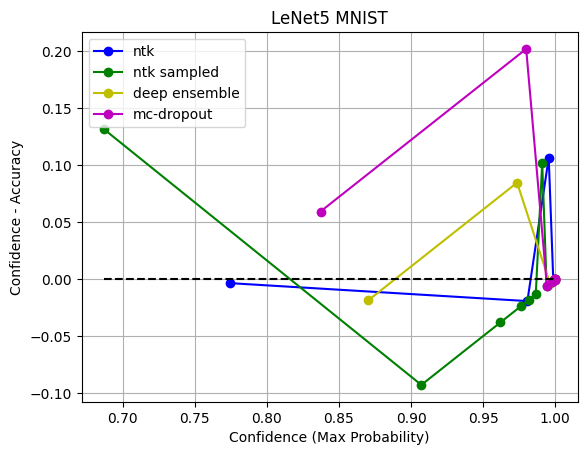

In [22]:
### Calibration curve
models = ['ntk','ntk sampled','deep ensemble','mc-dropout']
colours = ['b','g','y','m']
predictions = [y_pred_ntk,y_post_pred_ntk,ensemble_pred_avg,dropout_pred]
n_bins = 10

torch.set_printoptions(precision=4,sci_mode=False)
def calibration_curve_values(preds, target, n_bins, model='None'):
    '''
    INPUTS:
        - preds :: (n x c) torch.tensor
        - targets :: (n) torch.tensor

    OUTPUTS:
        - xs :: (n_bins) torch.tensor
            average confidence of prediction in each bin, given by softmax probability
        - ys :: (n_bins) torch.tensor
            average accuracy of predictions in each bin
    '''

    confidences, predictions = preds.softmax(dim=1).max(1)
    step = (confidences.shape[0] + n_bins -1) // n_bins
    bins = torch.sort(confidences)[0][::step]
    if confidences.shape[0] % step != 1:
        bins = torch.cat((bins, confidences.max().reshape(1)),dim=0)
    bin_lowers = bins[:-1]
    bin_uppers = bins[1:]
    accuracies = predictions == target
    xs = []
    ys = []
    for bin_lower_conf,bin_upper_conf in zip(bin_lowers,bin_uppers):
        in_bin = (confidences > bin_lower_conf) * (confidences < bin_upper_conf)
        prop_in_bin = in_bin.double().mean(dtype=torch.double)
        if prop_in_bin > 0:
            accuracy_in_bin = accuracies[in_bin].double().mean(dtype=torch.double)
            confidence_in_bin = confidences[in_bin].double().mean(dtype=torch.double)
            xs.append(confidence_in_bin)
            ys.append(accuracy_in_bin)
    xs = torch.tensor(xs)
    ys = torch.tensor(ys)

    return xs, ys

min_x = 1
fig1,ax1 = plt.subplots()
for i,m in enumerate(models):
    xs,ys = calibration_curve_values(predictions[i],test_y,n_bins,m)
    if xs.cpu().detach().numpy()[0] < min_x:
        min_x = xs.cpu().detach().numpy()[0]
    ax1.plot(xs.cpu().detach().numpy(),(xs - ys).cpu().detach().numpy(),
             '{}-o'.format(colours[i]),
             label=m)
ax1.plot(np.linspace(min_x,1,1000),np.zeros(1000),'--k')
ax1.set_xlabel('Confidence (Max Probability)')
ax1.set_ylabel('Confidence - Accuracy')
ax1.set_title('LeNet5 MNIST')
ax1.grid()
ax1.legend()
plt.show()

In [23]:
### Entropy Experiment - OOD Dataset - FashionMNIST

fmnist_dataset = datasets.FashionMNIST(
    root='data\FashionMNIST',
    train=False,
    download=True,
    transform=ToTensor()
)

ood_n = N_TEST
ood_test = torch.utils.data.Subset(
    fmnist_dataset,
    range(ood_n)
)

In [7]:
### Entropy Experiment - NTK
reload(df)

# Uncertainty for In-Distribution
rtol_solve = 1e-10
maxit_solve = 200

id_unc_ntk, _ = df.ntk_uncertainty_explicit_class(
    train_dataset=training_data,
    test_dataset=test_data,
    model=ntk_net,
    num_classes=10,
    type='iterative',
    rtol=rtol_solve,
    maxit=maxit_solve)

# Uncertainty for OOD
rtol_solve = 1e-10
maxit_solve = 200

ood_unc_ntk, _ = df.ntk_uncertainty_explicit_class(
    train_dataset=training_data,
    test_dataset=ood_test,
    model=ntk_net,
    num_classes=10,
    type='iterative',
    rtol=rtol_solve,
    maxit=maxit_solve)

C:\Users\s4531973\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\_functorch\deprecated.py:97: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.make_functional is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.func.functional_call instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('make_functional', 'torch.func.functional_call')
  4%|▎         | 37/1000 [00:18<08:05,  1.98it/s]


KeyboardInterrupt: 

In [28]:
print(np.max(ood_unc_ntk))

50.13156671540935


In [20]:
### Entropy Experiment - MC-Dropout

T = 30

## MNIST
id_dropout_pred, id_dropout_pred_var = dropout_sampler(test_x,T)

## FashionMNIST
FashionMNIST_loader = DataLoader(ood_test,len(ood_test))
FashionMNIST_set,_ = next(iter(FashionMNIST_loader))
ood_dropout_pred, ood_dropout_pred_var = dropout_sampler(FashionMNIST_set,T)

In [22]:
### Entropy Experiment - Deep Ensembles

## MNIST
id_ensemble_pred, id_ensemble_var = ensemble_sampler(test_x,ensemble_M)

## FashionMNIST
ood_ensemble_pred, ood_ensemble_pred_var = ensemble_sampler(FashionMNIST_set,ensemble_M)

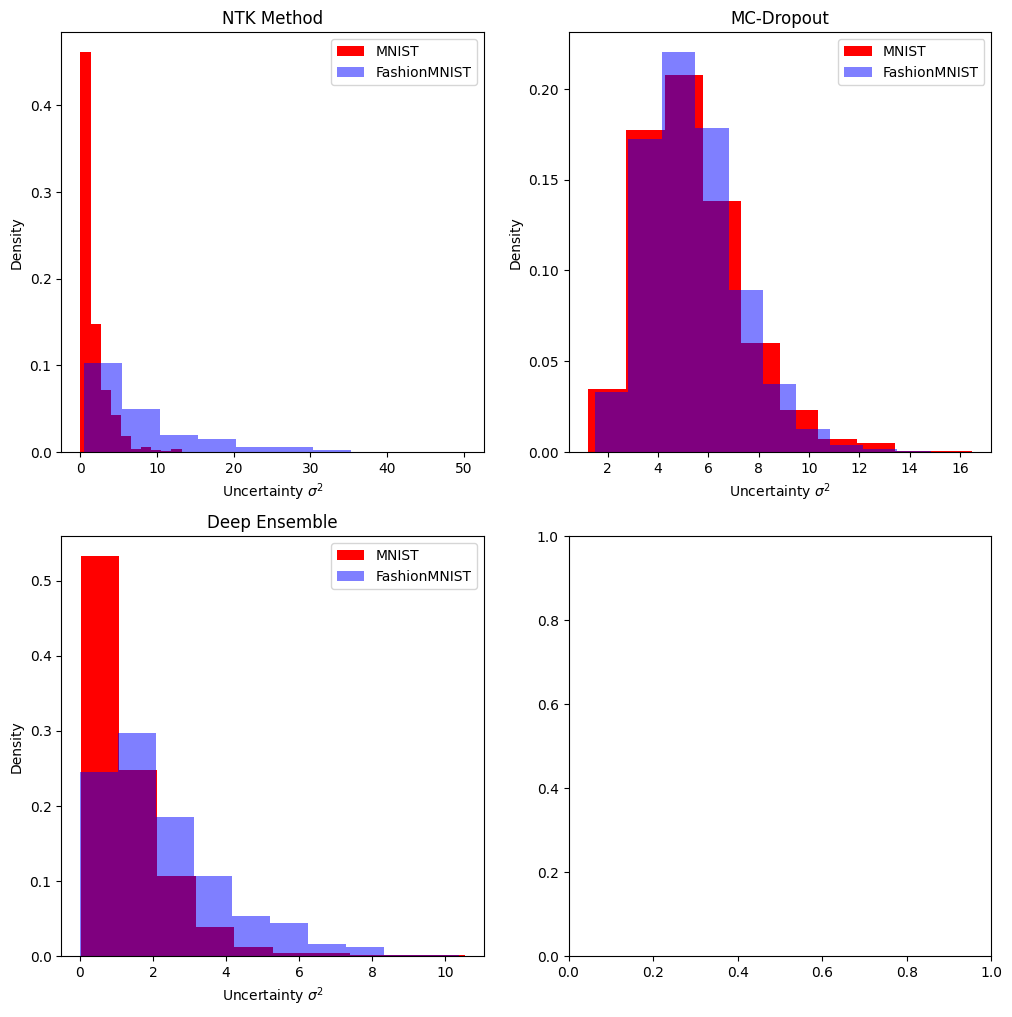

In [26]:
### Histogram of uncertainty values

fig2,((ax1,ax2),(ax3,_)) = plt.subplots(2,2)

fig2.set_figwidth(12)
fig2.set_figheight(12)

ax1.hist(id_unc_ntk.reshape(-1,1),bins=10,stacked=True,alpha=1,density=True,color='r',label='MNIST')
ax1.hist(ood_unc_ntk.reshape(-1,1),bins=10,stacked=True,alpha=0.5,density=True,color='b',label='FashionMNIST')
ax1.set_xlabel("Uncertainty $\sigma^2$")
ax1.set_ylabel("Density")
ax1.set_title("NTK Method")
ax1.legend()
# ax1.set_xlim(-0.2,np.max(ood_unc_ntk.reshape(-1,1)))

ax2.hist(id_dropout_pred_var.cpu().detach().numpy().reshape(-1,1),bins=10,stacked=True,alpha=1,density=True,color='r',label='MNIST')
ax2.hist(ood_dropout_pred_var.cpu().detach().numpy().reshape(-1,1),bins=10,stacked=True,alpha=0.5,density=True,color='b',label='FashionMNIST')
ax2.set_xlabel("Uncertainty $\sigma^2$")
ax2.set_ylabel("Density")
ax2.set_title("MC-Dropout")
ax2.legend()
# ax2.set_xlim(-0.2,np.max(ood_unc_ntk.reshape(-1,1)))

ax3.hist(id_ensemble_var.cpu().detach().numpy().reshape(-1,1),bins=10,stacked=True,alpha=1,density=True,color='r',label='MNIST')
ax3.hist(ood_ensemble_pred_var.cpu().detach().numpy().reshape(-1,1),bins=10,stacked=True,alpha=0.5,density=True,color='b',label='FashionMNIST')
ax3.set_xlabel("Uncertainty $\sigma^2$")
ax3.set_ylabel("Density")
ax3.set_title("Deep Ensemble")
ax3.legend()
# ax3.set_xlim(-0.2,np.max(ood_unc_ntk.reshape(-1,1)))
plt.show()